## Image classification using CNN (CIFAR10 dataset) deep learning with Tensorflow & Python


### Importing the libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


### Part 1 - Data Preprocessing

In [2]:
datasets.cifar10.load_data()

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [3]:
data = datasets.cifar10.load_data()

In [4]:
(X_train,y_train),(X_test,y_test)=data

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
X_train=X_train/255
X_test=X_test/255

### Part 2 - Building the CNN

### Initialising the CNN

In [10]:
cnn = tf.keras.models.Sequential()


### Step 1 - Convolution

Pooling

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

#Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

### Adding a second convolutional layer

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

### Step 3 - Flattening

In [13]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [14]:
cnn.add(tf.keras.layers.Dense(units=32, activation='relu'))

### Step 5 - Output Layer

In [15]:
cnn.add(tf.keras.layers.Dense(units=32, activation='softmax'))

### Compiling the CNN

In [16]:
cnn.compile(optimizer='adam',loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [20]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.5038 - accuracy: 0.4545
Epoch 2/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.1268 - accuracy: 0.6042
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9872 - accuracy: 0.6574
Epoch 4/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9023 - accuracy: 0.6857
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8402 - accuracy: 0.7072
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7902 - accuracy: 0.7269
Epoch 7/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7370 - accuracy: 0.7435
Epoch 8/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.6942 - accuracy: 0.7590
Epoch 9/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.6507 - accuracy: 0.7722
Epoch 10/10
1563/1563 [==============================] - 53s 34m

In [22]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 7s 15ms/step - loss: 1.1962 - accuracy: 0.6896


[1.1961989402770996, 0.6895999908447266]

### Make Prediction

In [23]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [24]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [25]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 5s 15ms/step


array([[1.2600078e-10, 2.1498359e-09, 1.6329182e-06, 9.7088921e-01,
        1.7980345e-07, 2.9082501e-02, 2.1676175e-05, 1.3662511e-08,
        1.7366425e-07, 4.6103814e-06],
       [4.4219462e-07, 2.5132740e-01, 1.1223616e-12, 7.8705084e-11,
        1.9277293e-14, 9.8850159e-15, 3.1994634e-16, 4.5981696e-15,
        7.4867171e-01, 4.2590909e-07],
       [7.6760076e-02, 1.5683249e-02, 2.3926129e-06, 5.8896543e-04,
        1.5319332e-05, 1.2654671e-04, 6.1915685e-05, 2.7218841e-05,
        8.9437580e-01, 1.2358498e-02],
       [9.5491368e-01, 3.5613331e-05, 2.8954414e-04, 8.6450695e-05,
        9.7592519e-08, 2.6116217e-07, 6.5787376e-08, 6.6579803e-10,
        4.4674218e-02, 5.2933830e-10],
       [3.1173089e-10, 3.2301141e-06, 2.0083243e-03, 4.4079311e-03,
        8.4541804e-01, 2.0773186e-04, 1.4795469e-01, 1.9606781e-09,
        4.0123527e-09, 3.8262336e-09]], dtype=float32)

In [26]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [29]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [30]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

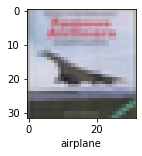

In [31]:
plot_sample(X_test, y_test,3)

In [32]:
classes[y_classes[3]]

'airplane'